Connecting to TMDB API database

In [12]:
import requests
import pandas as pd
import time
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
API_KEY = 'TYPE_YOUR_API_HERE'  # took out my API key here for privacy
url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_KEY}&language=en-US&page=1'
response = requests.get(url)
data = response.json()
print(data)

{'page': 1, 'results': [{'adult': False, 'backdrop_path': '/zOpe0eHsq0A2NvNyBbtT6sj53qV.jpg', 'genre_ids': [28, 878, 35, 10751], 'id': 939243, 'original_language': 'en', 'original_title': 'Sonic the Hedgehog 3', 'overview': 'Sonic, Knuckles, and Tails reunite against a powerful new adversary, Shadow, a mysterious villain with powers unlike anything they have faced before. With their abilities outmatched in every way, Team Sonic must seek out an unlikely alliance in hopes of stopping Shadow and protecting the planet.', 'popularity': 4079.904, 'poster_path': '/d8Ryb8AunYAuycVKDp5HpdWPKgC.jpg', 'release_date': '2024-12-19', 'title': 'Sonic the Hedgehog 3', 'video': False, 'vote_average': 7.89, 'vote_count': 1254}, {'adult': False, 'backdrop_path': '/vYqt6kb4lcF8wwqsMMaULkP9OEn.jpg', 'genre_ids': [16, 12, 10751, 35, 9648], 'id': 1241982, 'original_language': 'en', 'original_title': 'Moana 2', 'overview': "After receiving an unexpected call from her wayfinding ancestors, Moana journeys alon

In [2]:
url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_KEY}&language=en-US&page=1'
movies = requests.get(url).json()

In [3]:
movies

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/zOpe0eHsq0A2NvNyBbtT6sj53qV.jpg',
   'genre_ids': [28, 878, 35, 10751],
   'id': 939243,
   'original_language': 'en',
   'original_title': 'Sonic the Hedgehog 3',
   'overview': 'Sonic, Knuckles, and Tails reunite against a powerful new adversary, Shadow, a mysterious villain with powers unlike anything they have faced before. With their abilities outmatched in every way, Team Sonic must seek out an unlikely alliance in hopes of stopping Shadow and protecting the planet.',
   'popularity': 4079.904,
   'poster_path': '/d8Ryb8AunYAuycVKDp5HpdWPKgC.jpg',
   'release_date': '2024-12-19',
   'title': 'Sonic the Hedgehog 3',
   'video': False,
   'vote_average': 7.89,
   'vote_count': 1254},
  {'adult': False,
   'backdrop_path': '/vYqt6kb4lcF8wwqsMMaULkP9OEn.jpg',
   'genre_ids': [16, 12, 10751, 35, 9648],
   'id': 1241982,
   'original_language': 'en',
   'original_title': 'Moana 2',
   'overview': "After receiving an unexpe

Taking a look at genres

In [4]:
genre_url = f'https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US'
genres = requests.get(genre_url).json()
print(genres)

{'genres': [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}, {'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 36, 'name': 'History'}, {'id': 27, 'name': 'Horror'}, {'id': 10402, 'name': 'Music'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10749, 'name': 'Romance'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 10770, 'name': 'TV Movie'}, {'id': 53, 'name': 'Thriller'}, {'id': 10752, 'name': 'War'}, {'id': 37, 'name': 'Western'}]}


In [5]:
movies_df = pd.DataFrame(movies['results'])
print(movies_df.head())

   adult                     backdrop_path                  genre_ids  \
0  False  /zOpe0eHsq0A2NvNyBbtT6sj53qV.jpg       [28, 878, 35, 10751]   
1  False  /vYqt6kb4lcF8wwqsMMaULkP9OEn.jpg  [16, 12, 10751, 35, 9648]   
2  False  /v9Du2HC3hlknAvGlWhquRbeifwW.jpg      [28, 878, 12, 14, 53]   
3  False  /xZm5YUNY3PlYD1Q4k7X8zd2V4AK.jpg                   [28, 35]   
4  False  /qSOMdbZ6AOdHR999HWwVAh6ALFI.jpg               [28, 80, 53]   

        id original_language        original_title  \
0   939243                en  Sonic the Hedgehog 3   
1  1241982                en               Moana 2   
2   539972                en     Kraven the Hunter   
3   993710                en        Back in Action   
4  1249289                en                Alarum   

                                            overview  popularity  \
0  Sonic, Knuckles, and Tails reunite against a p...    4079.904   
1  After receiving an unexpected call from her wa...    2348.849   
2  Kraven Kravinoff's complex re

In [7]:
# original dataframe
movies_df

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/zOpe0eHsq0A2NvNyBbtT6sj53qV.jpg,"[28, 878, 35, 10751]",939243,en,Sonic the Hedgehog 3,"Sonic, Knuckles, and Tails reunite against a p...",4079.904,/d8Ryb8AunYAuycVKDp5HpdWPKgC.jpg,2024-12-19,Sonic the Hedgehog 3,False,7.890,1254
1,False,/vYqt6kb4lcF8wwqsMMaULkP9OEn.jpg,"[16, 12, 10751, 35, 9648]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,2348.849,/m0SbwFNCa9epW1X60deLqTHiP7x.jpg,2024-11-21,Moana 2,False,7.152,1053
2,False,/v9Du2HC3hlknAvGlWhquRbeifwW.jpg,"[28, 878, 12, 14, 53]",539972,en,Kraven the Hunter,Kraven Kravinoff's complex relationship with h...,2215.623,/i47IUSsN126K11JUzqQIOi1Mg1M.jpg,2024-12-11,Kraven the Hunter,False,6.599,911
3,False,/xZm5YUNY3PlYD1Q4k7X8zd2V4AK.jpg,"[28, 35]",993710,en,Back in Action,Fifteen years after vanishing from the CIA to ...,1977.830,/3L3l6LsiLGHkTG4RFB2aBA6BttB.jpg,2025-01-15,Back in Action,False,6.677,625
4,False,/qSOMdbZ6AOdHR999HWwVAh6ALFI.jpg,"[28, 80, 53]",1249289,en,Alarum,Two married spies caught in the crosshairs of ...,1565.784,/v313aUGmMNj6yNveaiQXysBmjVS.jpg,2025-01-16,Alarum,False,5.700,68
5,False,/h7r6LZ32dgLwtwSW3CxoWIYD9pr.jpg,"[27, 14]",426063,en,Nosferatu,A gothic tale of obsession between a haunted y...,1400.263,/5qGIxdEO841C0tdY8vOdLoRVrr0.jpg,2024-12-25,Nosferatu,False,6.600,1686
6,False,/oHPoF0Gzu8xwK4CtdXDaWdcuZxZ.jpg,"[12, 10751, 16]",762509,en,Mufasa: The Lion King,"Mufasa, a cub lost and alone, meets a sympathe...",1037.858,/jbOSUAWMGzGL1L4EaUF8K6zYFo7.jpg,2024-12-18,Mufasa: The Lion King,False,7.500,907
7,False,/pqulyfkug9A7TmmRn5zrbRA8TAY.jpg,"[28, 35]",1255788,fr,Le Jardinier,Every year the Prime Minister has a list of al...,895.714,/5T9WR7vIOnHm6xhVt5zBuPbBgt1.jpg,2025-01-30,The Gardener,False,6.200,27
8,False,/hAQnXxOwCjgYcKRgTdYPRC8neqL.jpg,"[28, 18]",811941,te,దేవర: Part 1,"Devara, a fearless man from a coastal region, ...",1020.425,/A9ENz6d4lC3UYOX8Z1gJwDEo1sM.jpg,2024-09-26,Devara: Part 1,False,7.029,52
9,False,/euYIwmwkmz95mnXvufEmbL6ovhZ.jpg,"[28, 12, 18]",558449,en,Gladiator II,Years after witnessing the death of the revere...,953.418,/2cxhvwyEwRlysAmRH4iodkvo0z5.jpg,2024-11-05,Gladiator II,False,6.754,2573


The ones above are only for POPULAR MOVIES

Creating Dataset for ALL movies:

Using only 2024 data so far for testing:

In [13]:
BASE_URL = "https://api.themoviedb.org/3"

def get_movies_by_year(year, max_pages=500):
    """Fetches movies for a given year, handling pagination."""
    movies = []
    
    for page in range(1, max_pages + 1):
        url = f"{BASE_URL}/discover/movie?api_key={API_KEY}&language=en-US&sort_by=popularity.desc&primary_release_year={year}&page={page}"
        response = requests.get(url)
        
        if response.status_code == 200:
            data = response.json()
            movies.extend(data["results"])
            if page >= data["total_pages"]:  
                break
        else:
            print(f"Failed to fetch movies for {year} (Page {page})")
            break

        time.sleep(0.5)  # hitting rate limits

    return movies

# 2024 movies
all_movies = []
for year in range(2024, 2025):  
    print(f"Fetching movies for {year}...")
    movies = get_movies_by_year(year)
    all_movies.extend(movies)

print(f"Total movies collected: {len(all_movies)}")

# saving to csv
df = pd.DataFrame(all_movies)
df.to_csv("tmdb_movies.csv", index=False)

Fetching movies for 2024...


KeyboardInterrupt: 

In [9]:
data = pd.read_csv('tmdb_movies.csv')
data.head(5)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/zOpe0eHsq0A2NvNyBbtT6sj53qV.jpg,"[28, 878, 35, 10751]",939243,en,Sonic the Hedgehog 3,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,/d8Ryb8AunYAuycVKDp5HpdWPKgC.jpg,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139
1,False,/v9Du2HC3hlknAvGlWhquRbeifwW.jpg,"[28, 878, 12, 14, 53]",539972,en,Kraven the Hunter,Kraven Kravinoff's complex relationship with h...,3006.227,/i47IUSsN126K11JUzqQIOi1Mg1M.jpg,2024-12-11,Kraven the Hunter,False,6.600,863
2,False,/h7r6LZ32dgLwtwSW3CxoWIYD9pr.jpg,"[27, 14]",426063,en,Nosferatu,A gothic tale of obsession between a haunted y...,2237.349,/5qGIxdEO841C0tdY8vOdLoRVrr0.jpg,2024-12-25,Nosferatu,False,6.602,1589
3,False,/jucn2CMjsraKDGUJ9eAfm3ZqvMI.jpg,"[16, 12, 10751, 35, 9648]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,1876.425,/aLVkiINlIeCkcZIzb7XHzPYgO6L.jpg,2024-11-21,Moana 2,False,7.100,940
4,False,/hAQnXxOwCjgYcKRgTdYPRC8neqL.jpg,"[28, 18]",811941,te,దేవర: Part 1,"Devara, a fearless man from a coastal region, ...",1350.040,/A9ENz6d4lC3UYOX8Z1gJwDEo1sM.jpg,2024-09-26,Devara: Part 1,False,7.063,48


# Cleaning and Organinzing Data

Removing Unncessary Columns

In [10]:
data = data[[
        "adult", "genre_ids", "id", "original_language", "overview", "popularity", "release_date", 
        "title", "video", "vote_average", "vote_count"
]]

In [11]:
data

,adult,genre_ids,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,"[28, 878, 35, 10751]",939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139
1,False,"[28, 878, 12, 14, 53]",539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863
2,False,"[27, 14]",426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589
3,False,"[16, 12, 10751, 35, 9648]",1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940
4,False,"[28, 18]",811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48
...,...,...,...,...,...,...,...,...,...,...,...
9994,False,"[10751, 12, 35]",1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0
9995,False,[35],1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0
9996,False,[99],1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0
9997,False,[27],1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1


Handling missing values

In [14]:
# lets leave overview for right now. this is just that some movies don't have a description
print(data.isnull().sum())  

adult                   0
genre_ids               0
id                      0
original_language       0
overview             1024
popularity              0
release_date            0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


Understanding and Converting Data Types

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              9999 non-null   bool   
 1   genre_ids          9999 non-null   object 
 2   id                 9999 non-null   int64  
 3   original_language  9999 non-null   object 
 4   overview           8975 non-null   object 
 5   popularity         9999 non-null   float64
 6   release_date       9999 non-null   object 
 7   title              9999 non-null   object 
 8   video              9999 non-null   bool   
 9   vote_average       9999 non-null   float64
 10  vote_count         9999 non-null   int64  
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 722.7+ KB


In [16]:
data.describe()

,id,popularity,vote_average,vote_count
count,9.999000e+03,9999.000000,9999.000000,9999.000000
mean,1.238613e+06,11.229052,3.379701,26.591759
std,1.569999e+05,87.996837,3.523449,201.235695
min,5.492000e+03,0.562000,0.000000,0.000000
25%,1.189734e+06,1.315000,0.000000,0.000000
50%,1.272285e+06,1.975000,2.500000,1.000000
75%,1.352988e+06,3.796000,6.600000,4.000000
max,1.424858e+06,5790.376000,10.000000,6522.000000


In [17]:
data.duplicated().sum()

np.int64(701)

In [18]:
data[data.duplicated()]

,adult,genre_ids,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count
27,False,"[16, 18, 35]",1064486,en,Forcibly separated from her twin brother when ...,623.409,2024-10-17,Memoir of a Snail,False,7.697,109
160,False,"[10749, 18, 35]",843527,en,40-year-old single mom Solène begins an unexpe...,111.051,2024-05-02,The Idea of You,False,7.406,1580
165,False,"[28, 80, 53]",972614,en,"A contract killer, after being diagnosed with ...",107.176,2024-03-15,Knox Goes Away,False,6.960,328
169,False,"[16, 12, 35, 10751]",1154304,es,Mary and Tom are parentless Irish siblings who...,106.215,2024-08-14,Buffalo Kids,False,6.800,20
170,False,"[16, 12, 35, 10751]",1389038,en,Mickey makes a magical wish that every day cou...,106.172,2024-12-01,Mickey and the Very Many Christmases,False,6.000,12
...,...,...,...,...,...,...,...,...,...,...,...
9971,False,[99],1262155,pt,A sound and visual journey that portrays the l...,1.312,2024-04-13,Luiz Melodia - Within the Heart of Brazil,False,8.500,2
9974,False,[35],1412034,da,NaN,1.105,2024-12-31,"Dan Andersen - Nedsat Hørelse, Nedsat Sædkvali...",False,0.000,0
9976,False,"[18, 53]",1396735,en,"As their son's health deteriorates, a couple g...",1.310,2024-11-20,Changes,False,0.000,0
9977,False,[35],1380451,fr,NaN,1.310,2024-10-31,Les Capone attendent un bébé,False,1.000,1


In [19]:
duplicate_count = data.duplicated(subset=['id'], keep=False).sum()
print(duplicate_count)


1422


In [20]:
duplicate_rows = data[data.duplicated(subset=['id'], keep=False)]
print(duplicate_rows)

      adult            genre_ids       id original_language  \
17    False         [16, 18, 35]  1064486                en   
27    False         [16, 18, 35]  1064486                en   
133   False  [16, 12, 35, 10751]  1154304                es   
142   False             [28, 53]  1154223                fr   
144   False      [10749, 18, 35]   843527                en   
...     ...                  ...      ...               ...   
9971  False                 [99]  1262155                pt   
9974  False                 [35]  1412034                da   
9976  False             [18, 53]  1396735                en   
9977  False                 [35]  1380451                fr   
9978  False          [99, 10770]  1353508                fr   

                                               overview  popularity  \
17    Forcibly separated from her twin brother when ...     623.409   
27    Forcibly separated from her twin brother when ...     623.409   
133   Mary and Tom are parentl

In [21]:
sorted_duplicates = duplicate_rows.sort_values(by=['id'])
print(sorted_duplicates)

      adult     genre_ids       id original_language  \
243   False  [28, 53, 80]     5492                en   
261   False  [28, 53, 80]     5492                en   
1862  False   [10749, 18]   269579                es   
1423  False   [10749, 18]   269579                es   
285   False  [80, 53, 28]   413846                en   
...     ...           ...      ...               ...   
481   False   [18, 10749]  1414642                en   
8336  False   [99, 10402]  1417621                pt   
9682  False   [99, 10402]  1417621                pt   
9959  False      [28, 18]  1420980                en   
8695  False      [28, 18]  1420980                en   

                                               overview  popularity  \
243   While on a camping trip in order to reconnect,...      69.171   
261   While on a camping trip in order to reconnect,...      69.171   
1862  Refugio, a romantic dreamer whose years long q...       5.295   
1423  Refugio, a romantic dreamer whose yea

In [22]:
duplicate_counts = data['id'].value_counts()
duplicates_only = duplicate_counts[duplicate_counts > 1]
print(duplicates_only)

id
1126475    4
413846     4
1052280    4
1255616    3
1209217    3
          ..
1033786    2
1310811    2
1087822    2
848439     2
1129610    2
Name: count, Length: 702, dtype: int64


This could mean that in a movie theatre they could present multiple times and so it is recorded multiple times in the database

In [23]:
specific_id = 1126475  # duplicate ID's here to see
specific_duplicates = data[data['id'] == specific_id]
print(specific_duplicates)

     adult genre_ids       id original_language  \
217  False  [35, 14]  1126475                en   
258  False  [35, 14]  1126475                en   
275  False  [35, 14]  1126475                en   
286  False  [35, 14]  1126475                en   

                                              overview  popularity  \
217  When Joan’s husband dies, she is shocked to di...      65.931   
258  When Joan’s husband dies, she is shocked to di...      65.931   
275  When Joan’s husband dies, she is shocked to di...      65.931   
286  When Joan’s husband dies, she is shocked to di...      65.931   

    release_date            title  video  vote_average  vote_count  
217   2024-09-19  Arthur's Whisky  False           7.0           3  
258   2024-09-19  Arthur's Whisky  False           7.0           3  
275   2024-09-19  Arthur's Whisky  False           7.0           3  
286   2024-09-19  Arthur's Whisky  False           7.0           3  


In [24]:
data.loc[243]

adult                                                            False
genre_ids                                                 [28, 53, 80]
id                                                                5492
original_language                                                   en
overview             While on a camping trip in order to reconnect,...
popularity                                                      69.171
release_date                                                2024-08-16
title                                                           Gunner
video                                                            False
vote_average                                                       5.3
vote_count                                                         112
Name: 243, dtype: object

In [25]:
data.loc[261]

adult                                                            False
genre_ids                                                 [28, 53, 80]
id                                                                5492
original_language                                                   en
overview             While on a camping trip in order to reconnect,...
popularity                                                      69.171
release_date                                                2024-08-16
title                                                           Gunner
video                                                            False
vote_average                                                       5.3
vote_count                                                         112
Name: 261, dtype: object

In [26]:
data_cleaned = data.drop_duplicates(subset=['id'], keep='first')

In [27]:
print(data_cleaned.duplicated(subset=['id']).sum())  

0


In [28]:
data_cleaned

,adult,genre_ids,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,"[28, 878, 35, 10751]",939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139
1,False,"[28, 878, 12, 14, 53]",539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863
2,False,"[27, 14]",426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589
3,False,"[16, 12, 10751, 35, 9648]",1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940
4,False,"[28, 18]",811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48
...,...,...,...,...,...,...,...,...,...,...,...
9994,False,"[10751, 12, 35]",1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0
9995,False,[35],1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0
9996,False,[99],1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0
9997,False,[27],1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1


Mapping genres into the Dataset

In [30]:
BASE_URL = "https://api.themoviedb.org/3"

# Function to fetch genres
def get_genres():
    url = f"{BASE_URL}/genre/movie/list?api_key={API_KEY}&language=en-US"
    response = requests.get(url)
    return response.json()["genres"] if response.status_code == 200 else None

genres_data = get_genres()
genre_mapping = {genre["id"]: genre["name"] for genre in genres_data}

print(genre_mapping)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


Mapping:

In [31]:
data_cleaned

,adult,genre_ids,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,"[28, 878, 35, 10751]",939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139
1,False,"[28, 878, 12, 14, 53]",539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863
2,False,"[27, 14]",426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589
3,False,"[16, 12, 10751, 35, 9648]",1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940
4,False,"[28, 18]",811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48
...,...,...,...,...,...,...,...,...,...,...,...
9994,False,"[10751, 12, 35]",1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0
9995,False,[35],1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0
9996,False,[99],1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0
9997,False,[27],1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1


In [32]:
empty_count = (data_cleaned['genre_ids'] == "[]").sum()
print(f"Number of rows with empty genre_ids: {empty_count}")

Number of rows with empty genre_ids: 588


In [33]:
data_cleaned["genre_ids"] = data_cleaned["genre_ids"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data_cleaned["genres"] = data_cleaned["genre_ids"].apply(lambda x: [genre_mapping.get(genre_id, "Unknown") for genre_id in x])
data_cleaned.drop(columns=["genre_ids"], inplace=True)


data_cleaned.to_csv("tmdb_movies_mapped.csv", index=False)


/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/131337954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["genre_ids"] = data_cleaned["genre_ids"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/131337954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["genres"] = data_cleaned["genre_ids"].apply(lambda x: [genre_mapping.get(genre_id, "Unknown") for genre_id in x])
/var/folder

In [34]:
data_cleaned

,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genres
0,False,939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139,"[Action, Science Fiction, Comedy, Family]"
1,False,539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863,"[Action, Science Fiction, Adventure, Fantasy, ..."
2,False,426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589,"[Horror, Fantasy]"
3,False,1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940,"[Animation, Adventure, Family, Comedy, Mystery]"
4,False,811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48,"[Action, Drama]"
...,...,...,...,...,...,...,...,...,...,...,...
9994,False,1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0,"[Family, Adventure, Comedy]"
9995,False,1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0,[Comedy]
9996,False,1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0,[Documentary]
9997,False,1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1,[Horror]


In [ ]:
data_cleaned = data_cleaned[data_cleaned["original_language"] == "en"]
data_cleaned

,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genres
0,False,939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139,"[Action, Science Fiction, Comedy, Family]"
1,False,539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863,"[Action, Science Fiction, Adventure, Fantasy, ..."
2,False,426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589,"[Horror, Fantasy]"
3,False,1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940,"[Animation, Adventure, Family, Comedy, Mystery]"
5,False,762509,en,"Mufasa, a cub lost and alone, meets a sympathe...",1649.483,2024-12-18,Mufasa: The Lion King,False,7.500,896,"[Adventure, Family, Animation]"
...,...,...,...,...,...,...,...,...,...,...,...
9987,False,1105952,en,When model-maker Olivia’s dad is set to retire...,0.977,2024-02-09,Modeled with Love,False,5.000,1,"[TV Movie, Comedy, Romance]"
9988,False,1408213,en,"Brash and vibrant, Tamar Rubin stakes her clai...",0.976,2024-12-24,Tamar Rubin: But Sir!,False,0.000,0,[Comedy]
9994,False,1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0,"[Family, Adventure, Comedy]"
9995,False,1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0,[Comedy]


# Exploratory Data Analysis

Popularity trends over time

/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/2390198234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['release_date'] = pd.to_datetime(data_cleaned['release_date'], errors='coerce')
/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/2390198234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month'] = data_cleaned['release_date'].dt.month  # Extract the month


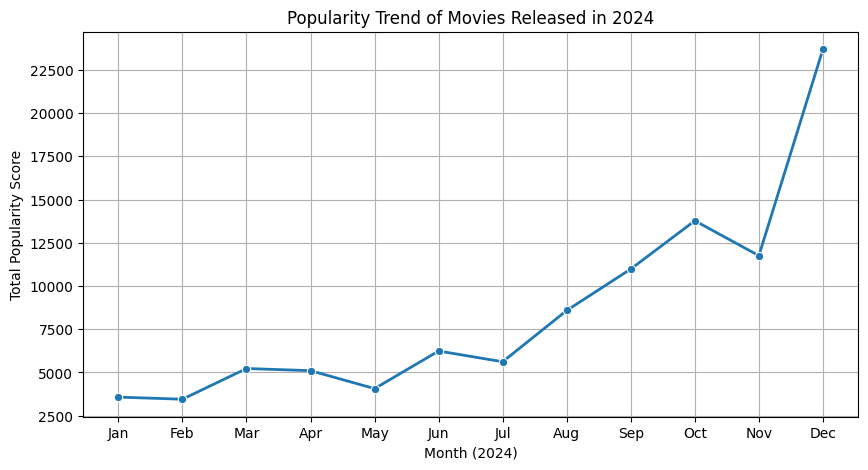

In [35]:
data_cleaned['release_date'] = pd.to_datetime(data_cleaned['release_date'], errors='coerce')  
data_cleaned['month'] = data_cleaned['release_date'].dt.month  # Extract the month

monthly_popularity = data_cleaned.groupby('month')['popularity'].sum()  

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_popularity.index, y=monthly_popularity.values, marker='o', linewidth=2)

plt.xlabel("Month (2024)")
plt.ylabel("Total Popularity Score")
plt.title("Popularity Trend of Movies Released in 2024")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

- newer movies may have a more popular spike
- this may not be strong information especially if were to compare it to the CCI only because popularity is based on when a movie comes on

In [36]:
data_cleaned

,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genres,month
0,False,939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139,"[Action, Science Fiction, Comedy, Family]",12
1,False,539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863,"[Action, Science Fiction, Adventure, Fantasy, ...",12
2,False,426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589,"[Horror, Fantasy]",12
3,False,1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940,"[Animation, Adventure, Family, Comedy, Mystery]",11
4,False,811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48,"[Action, Drama]",9
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0,"[Family, Adventure, Comedy]",9
9995,False,1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0,[Comedy],8
9996,False,1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0,[Documentary],8
9997,False,1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1,[Horror],4


/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/2906496158.py:12: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(


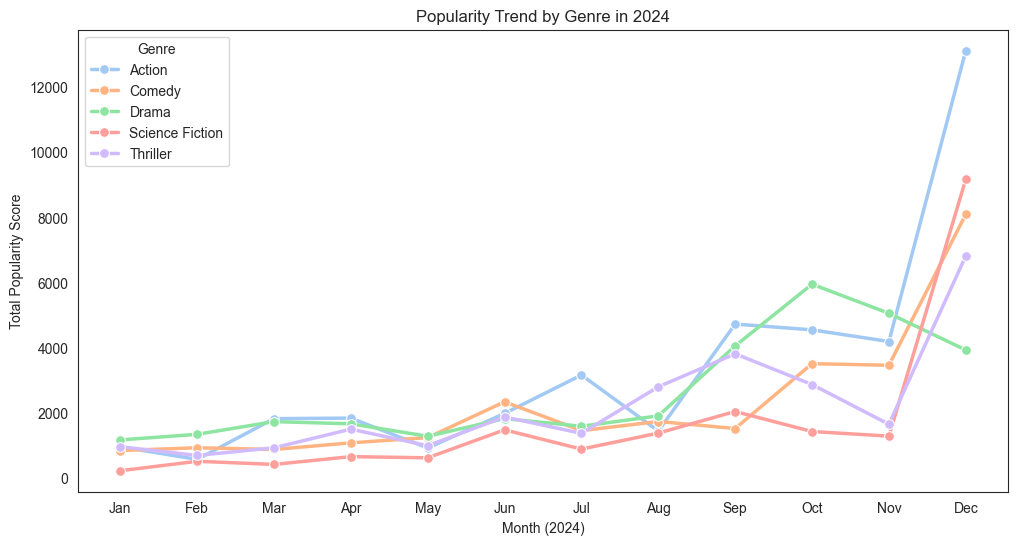

In [37]:
df_exploded = data_cleaned.explode('genres')
genre_trend = df_exploded.groupby(['month', 'genres'])['popularity'].sum().reset_index()

# only taking top 5 genres
top_genres = genre_trend.groupby('genres')['popularity'].sum().nlargest(5).index  
genre_trend_filtered = genre_trend[genre_trend['genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.set_style("white")  
palette = sns.color_palette("pastel")  

sns.lineplot(
    data=genre_trend_filtered, 
    x='month', y='popularity', 
    hue='genres', marker='o', markersize=7, linewidth=2.5, 
    palette=palette
)

plt.xlabel("Month (2024)")
plt.ylabel("Total Popularity Score")
plt.title("Popularity Trend by Genre in 2024")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Genre", loc="upper left")
plt.show()

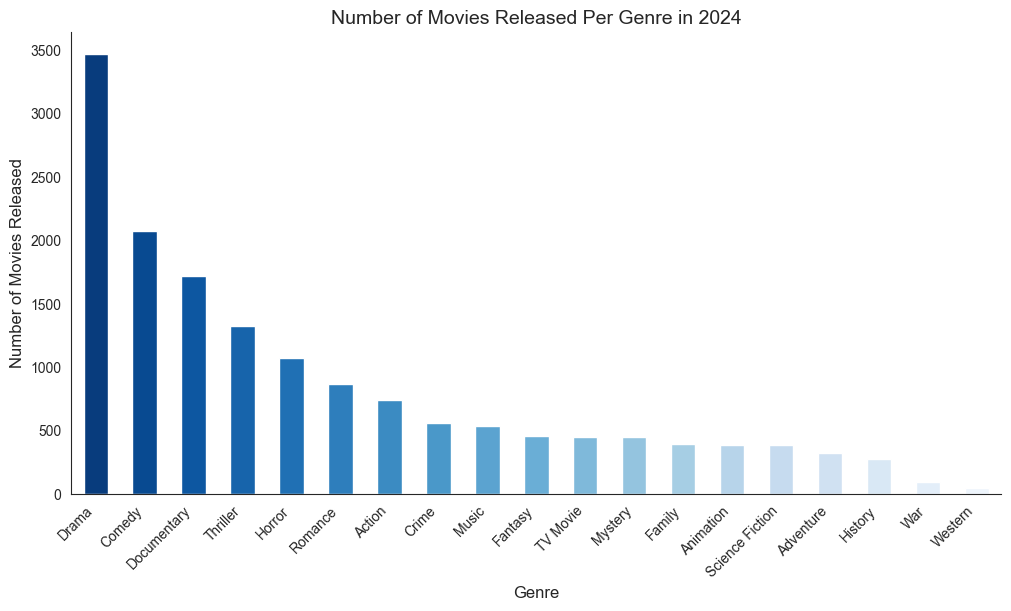

In [38]:
# using 2024, before tried testing on 2023 and 2024
data_2024 = data_cleaned[data_cleaned["release_date"].dt.year == 2024]

genre_counts_2024 = data_2024.explode("genres").groupby("genres")["id"].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

colors = sns.color_palette("Blues", len(genre_counts_2024))
colors.reverse()  

genre_counts_2024.plot(kind="bar", color=colors)

plt.title("Number of Movies Released Per Genre in 2024", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Movies Released", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/3054812371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["release_date"] = pd.to_datetime(data_cleaned["release_date"], errors="coerce")
/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/3054812371.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_release_count.index[::-1], y=monthly_release_count.values[::-1], palette=colors)


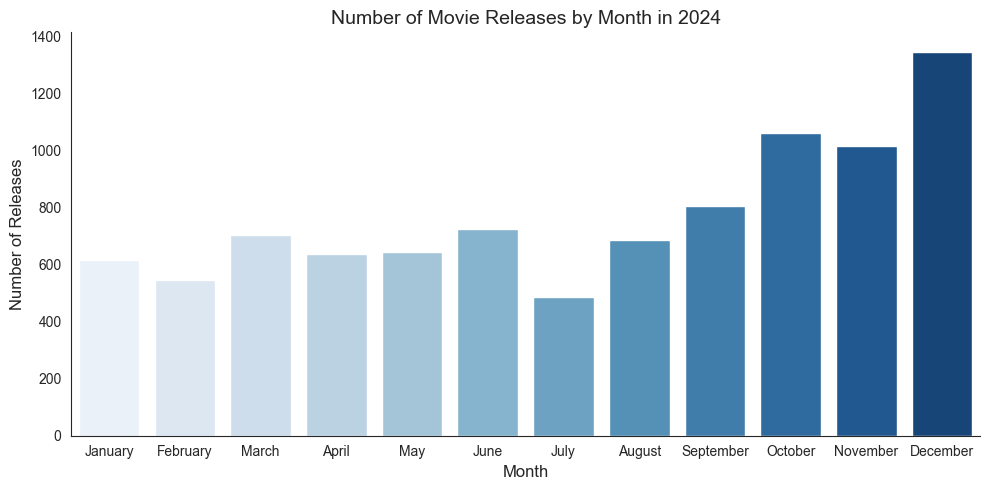

In [39]:
data_cleaned["release_date"] = pd.to_datetime(data_cleaned["release_date"], errors="coerce")

data_2024 = data_cleaned[data_cleaned["release_date"].dt.year == 2024]

data_2024["month"] = data_2024["release_date"].dt.month

monthly_release_count = data_2024["month"].value_counts().sort_index()

plt.figure(figsize=(10, 5))

colors = sns.color_palette("Blues", len(monthly_release_count))

sns.barplot(x=monthly_release_count.index[::-1], y=monthly_release_count.values[::-1], palette=colors)

plt.title("Number of Movie Releases by Month in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Releases", fontsize=12)
plt.xticks(range(0, 12), ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"], fontsize=10)

plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

I want to be able to see whether or not can we predict when someone is more likely to come in and watch films? 
- so like for a particular month are movie makers following the CCI and released movies by the confidence
- if we know what movies work well ahead of time we can work that with the advertising team

Gathering CCI data for 2024

In [40]:
CCI = {
    "January" : 110.900,
    "February" : 104.800,
    "March" : 103.100,
    "April" : 97.500,
    "May" : 101.300,
    "June" : 97.800,
    "July" : 101.900,
    "August" : 105.600,
    "September" : 99.200,
    "October" : 109.600,
    "November" : 112.800,
    "December" : 104.700
}

In [41]:
cci_df = pd.DataFrame(list(CCI.items()), columns=["month_name", "CCI"])
print(cci_df)

   month_name    CCI
0     January  110.9
1    February  104.8
2       March  103.1
3       April   97.5
4         May  101.3
5        June   97.8
6        July  101.9
7      August  105.6
8   September   99.2
9     October  109.6
10   November  112.8
11   December  104.7


In [42]:
data_cleaned["release_date"] = pd.to_datetime(data_cleaned["release_date"])

data_cleaned["month_name"] = data_cleaned["release_date"].dt.strftime("%B")

print(data_cleaned[["release_date", "month_name"]].head())

  release_date month_name
0   2024-12-19   December
1   2024-12-11   December
2   2024-12-25   December
3   2024-11-21   November
4   2024-09-26  September


/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/3521918340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["release_date"] = pd.to_datetime(data_cleaned["release_date"])
/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/3521918340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["month_name"] = data_cleaned["release_date"].dt.strftime("%B")


In [43]:
# merging with month here
data_cleaned = data_cleaned.merge(cci_df, on="month_name", how="left")

print(data_cleaned[["release_date", "month_name", "CCI"]].head())

  release_date month_name    CCI
0   2024-12-19   December  104.7
1   2024-12-11   December  104.7
2   2024-12-25   December  104.7
3   2024-11-21   November  112.8
4   2024-09-26  September   99.2


In [44]:
data_cleaned

,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genres,month,month_name,CCI
0,False,939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139,"[Action, Science Fiction, Comedy, Family]",12,December,104.7
1,False,539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863,"[Action, Science Fiction, Adventure, Fantasy, ...",12,December,104.7
2,False,426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589,"[Horror, Fantasy]",12,December,104.7
3,False,1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940,"[Animation, Adventure, Family, Comedy, Mystery]",11,November,112.8
4,False,811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48,"[Action, Drama]",9,September,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,False,1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0,"[Family, Adventure, Comedy]",9,September,99.2
9275,False,1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0,[Comedy],8,August,105.6
9276,False,1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0,[Documentary],8,August,105.6
9277,False,1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1,[Horror],4,April,97.5


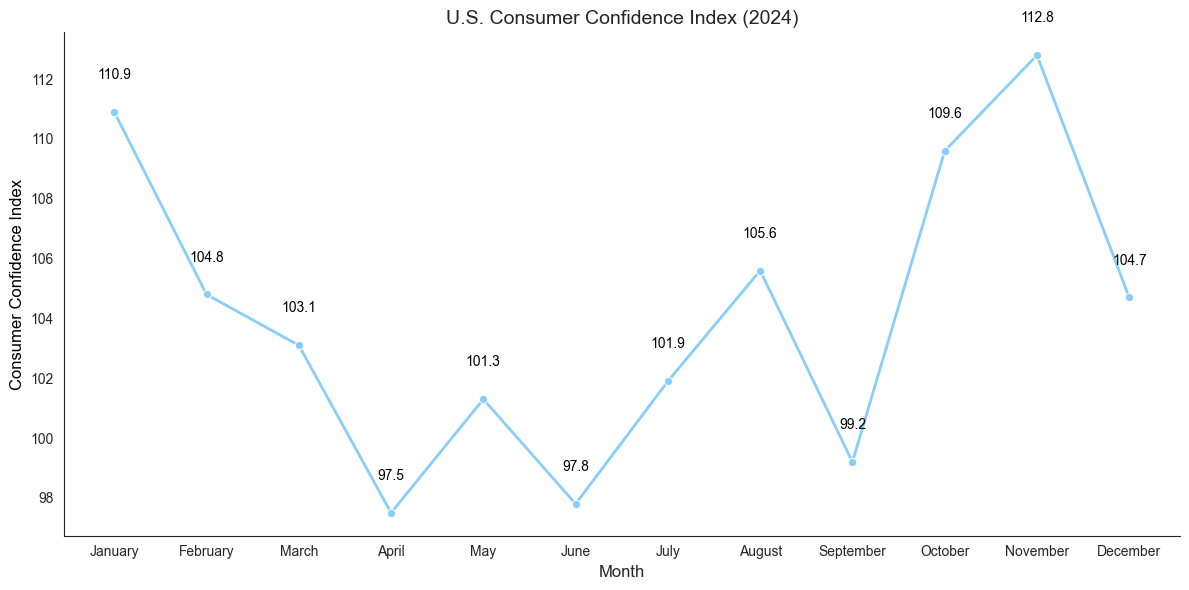

In [45]:
monthly_releases = data_cleaned.groupby("month_name")["id"].count().reset_index()
monthly_releases.rename(columns={"id": "movie_count"}, inplace=True)

monthly_data = monthly_releases.merge(cci_df, on="month_name")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_data["month_name"] = pd.Categorical(monthly_data["month_name"], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values("month_name")

plt.figure(figsize=(12, 6))

sns.lineplot(x=monthly_data["month_name"], y=monthly_data["CCI"], 
             color="lightskyblue", marker="o", linewidth=2)

for i, value in enumerate(monthly_data["CCI"]):
    plt.text(i, value + 1, f"{value:.1f}", ha="center", va="bottom", fontsize=10, color="black")

plt.xlabel("Month", fontsize=12)
plt.ylabel("Consumer Confidence Index", fontsize=12, color="black")
plt.title("U.S. Consumer Confidence Index (2024)", fontsize=14)
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_94353/3959901714.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_month = genre_monthly_releases.groupby("month_name", group_keys=False).apply(lambda x: x.nlargest(3, "movie_count"))


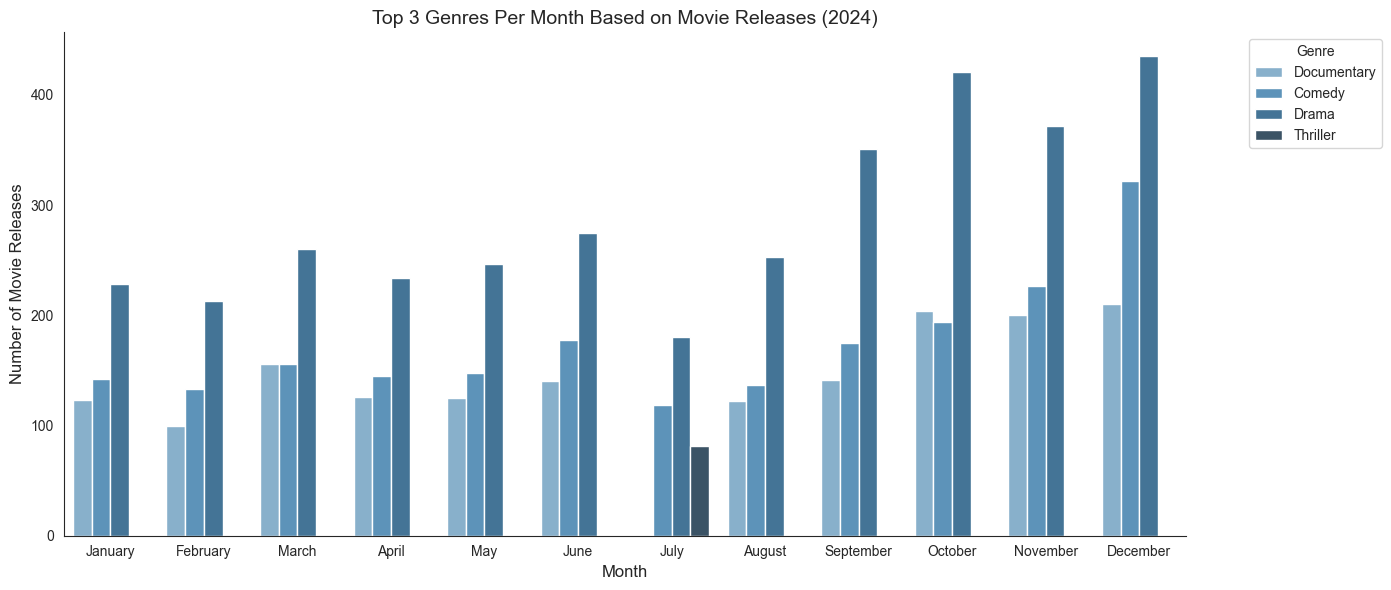

In [46]:
data_cleaned_exploded = data_cleaned.explode("genres")

genre_monthly_releases = data_cleaned_exploded.groupby(["month_name", "genres"])["id"].count().reset_index()
genre_monthly_releases.rename(columns={"id": "movie_count"}, inplace=True)

top_genres_per_month = genre_monthly_releases.groupby("month_name", group_keys=False).apply(lambda x: x.nlargest(3, "movie_count"))

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

top_genres_per_month["month_name"] = pd.Categorical(top_genres_per_month["month_name"], categories=month_order, ordered=True)

top_genres_per_month = top_genres_per_month.sort_values("month_name")

plt.figure(figsize=(14, 6))

sns.barplot(x="month_name", y="movie_count", hue="genres", data=top_genres_per_month, palette="Blues_d")

plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Movie Releases", fontsize=12)
plt.title("Top 3 Genres Per Month Based on Movie Releases (2024)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [47]:
data_cleaned

,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genres,month,month_name,CCI
0,False,939243,en,"Sonic, Knuckles, and Tails reunite against a p...",5790.376,2024-12-19,Sonic the Hedgehog 3,False,7.850,1139,"[Action, Science Fiction, Comedy, Family]",12,December,104.7
1,False,539972,en,Kraven Kravinoff's complex relationship with h...,3006.227,2024-12-11,Kraven the Hunter,False,6.600,863,"[Action, Science Fiction, Adventure, Fantasy, ...",12,December,104.7
2,False,426063,en,A gothic tale of obsession between a haunted y...,2237.349,2024-12-25,Nosferatu,False,6.602,1589,"[Horror, Fantasy]",12,December,104.7
3,False,1241982,en,After receiving an unexpected call from her wa...,1876.425,2024-11-21,Moana 2,False,7.100,940,"[Animation, Adventure, Family, Comedy, Mystery]",11,November,112.8
4,False,811941,te,"Devara, a fearless man from a coastal region, ...",1350.040,2024-09-26,Devara: Part 1,False,7.063,48,"[Action, Drama]",9,September,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,False,1330319,en,"Olivia, lost in the shadow of her parent’s bus...",0.976,2024-09-06,Stinky Summer,False,0.000,0,"[Family, Adventure, Comedy]",9,September,99.2
9275,False,1328595,en,Award-winning comedian Pierre Novellie’s lates...,0.976,2024-08-11,Pierre Novellie: Why Can’t I Just Enjoy Things,False,0.000,0,[Comedy],8,August,105.6
9276,False,1320201,en,With a national vote approaching to enshrine I...,0.976,2024-08-21,Voice,False,0.000,0,[Documentary],8,August,105.6
9277,False,1304146,ms,"Two detectives, Khairul and Juwita, must solve...",0.976,2024-04-24,Bisikan Setan,False,9.000,1,[Horror],4,April,97.5
